In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data, we have data in excel format
train = pd.read_excel('train_agriculture.xlsx')
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
train.shape

(4599, 10)

In [4]:
#  I will be removing the ID column, as it is not needed for my analysis.
train.drop('ID',axis=1,inplace=True)

In [5]:
for i in train.columns:
    if i != 'Estimated_Insects_Count' :
        print((train[i].value_counts()))

0    3565
1    1034
Name: Crop_Type, dtype: int64
0    2407
1    2192
Name: Soil_Type, dtype: int64
2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64
20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64
20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64
0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7      122
9      118
4      117
11     116
16     105
17      94
19      87
18      83
22      83
21      74
23      54
24      52
25      48
28      46
29      41
26      41
27      37
30      34
31      25
32      21
33      16
34      16
35

we have categorical variables:
    1 - Crop_Type,
    2 - Soil_Type,
    3 - Pestiside_Use_Category,
    4 - Season,
    5 - Crop_Damage

# Checking missing values

In [6]:
train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [7]:
#filling up missing values using forward fill method.
new_train = train.fillna(method='ffill')

In [8]:
new_train.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [9]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4599 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [10]:
new_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.806480,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.628563,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Estimated_Insects_count is a countinous variable and it seems that we will be scaling this column later, also there is a huge diff (75 quantile to max) there is sense of finding outliers.

minimum number of doses per week is 0 and maximum is 95.

number of weeks on which pestidides/chemical is used ( minimum =0 , maximum = 66)



# Univariate Analysis

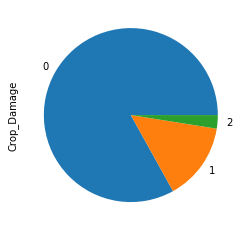

In [11]:
new_train.Crop_Damage.value_counts().plot(kind='pie',figsize=(6,4))

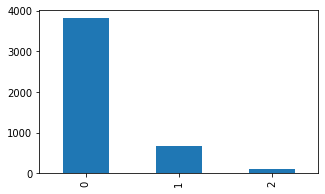

In [12]:
new_train.Crop_Damage.value_counts().plot(kind='bar',figsize=(5,3))

From the above Pie chart we can see that the damage from perstiside is very low, however damage due to other causes like locusts, weather, etc is more.

In [13]:
#checking which crop causes more insects.

Crop_type = new_train.groupby('Crop_Type').sum().reset_index()

In [14]:
Crop_type.head()

,Crop_Type,Estimated_Insects_Count,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,4916808,1867,7824,99275,102758.0,37917,6754,674
1,1,1351631,325,2678,22495,29723.0,4419,1958,220


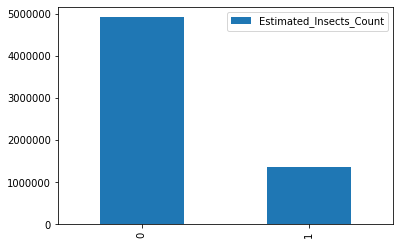

In [15]:
Crop_type.plot(kind='bar',y='Estimated_Insects_Count')

From the above bar plot we can see that the Kharif crops are more prone to insects, the reason being Kharif crops are grown in humid and warm climate and these conditions are more favourable for infestation of insect pests and diseases.

In [16]:
#checking in which season there are more number of insects.

season_type = new_train.groupby(['Season']).sum().reset_index()

In [17]:
season_type

,Season,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage
0,1,1893218,306,662,3145,36555,40098.0,12661,266
1,2,3169098,532,1082,5309,61715,66813.0,21337,480
2,3,1206123,196,448,2048,23500,25570.0,8338,148


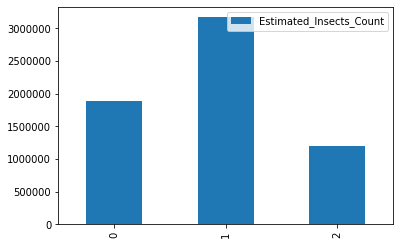

In [18]:
season_type.plot(kind='bar',y='Estimated_Insects_Count')

from the above graphs we can see that during summer, crops are more prone to insects.

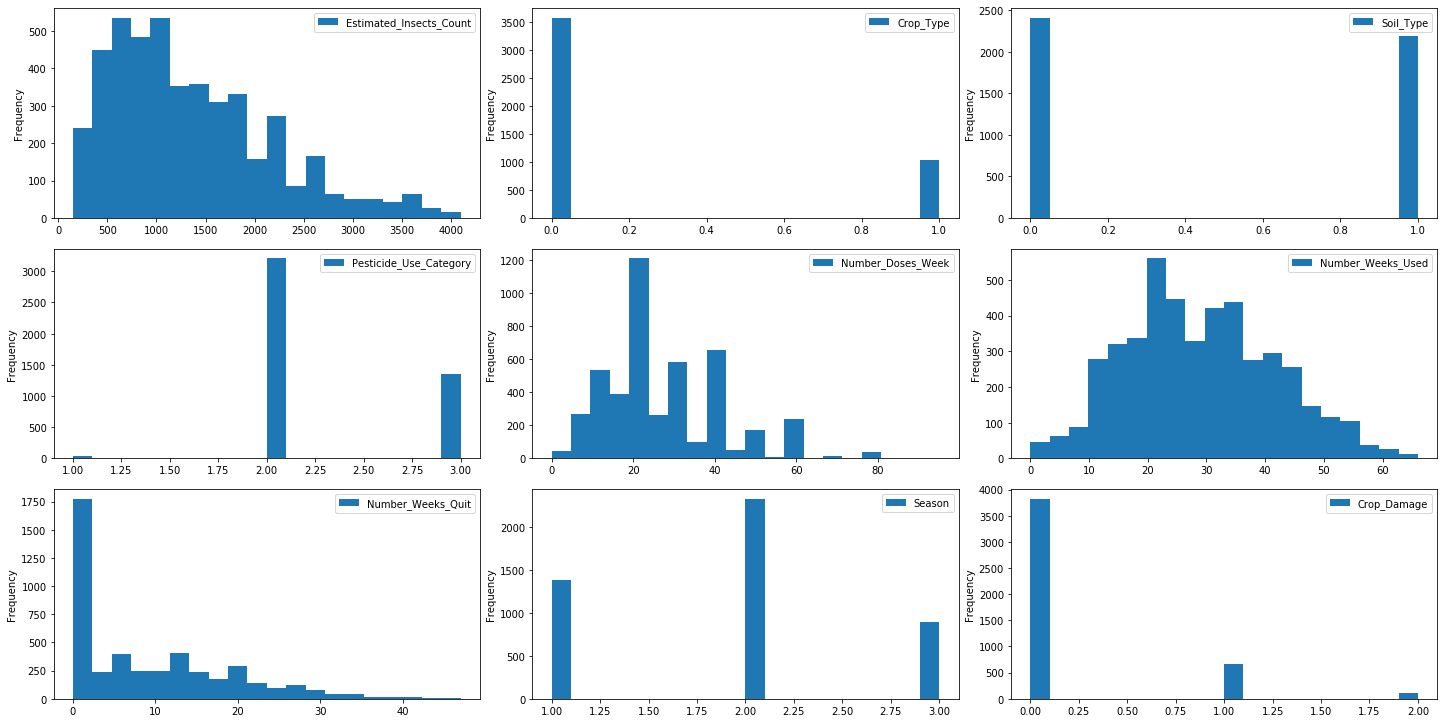

In [19]:
#plotting histogram of all variables as subplots

fig, ax = plt.subplots(ncols=3 ,nrows=3 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in new_train.items():
        new_train.plot(kind='hist',y=i,ax=ax[index],bins=20)
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)

Estimated_insect_count seems rightly skewed, from 500 to 1200 frequency of Estimated_insects_count is higher.

We can clearly see that the crop_type 0 is more than crop_type 1.

Soil Type is approximately normally distributed.

There are more crops in the data on which pesticides has been previously used.

Number_Doses_week is a bit right skewed, most of the crops uses 20 doses per week (doses of pestisides)

Number_weeks_used is approx normally ditributed, most of the crops were using pesticides for 20 weeks.

More crops are dependent on monsson season. Less in winters.

Crop damage shows that about 600-700 crops were damaged due to other cause , and about 200-250 crops were damaged due to pestisides, chemicals.

In [20]:
#Checking which soil type is more prone to number of insects
new_train.groupby('Soil_Type')['Estimated_Insects_Count'].sum().reset_index()

,Soil_Type,Estimated_Insects_Count
0,0,3564684
1,1,2703755


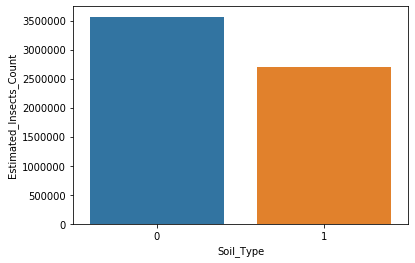

In [21]:
sns.barplot(x='Soil_Type',y='Estimated_Insects_Count',data=new_train.groupby('Soil_Type')['Estimated_Insects_Count'].sum().reset_index())

#from the above graph we can see that the soil type 0 is more prone to insects, and hence will require more chemicals for prevention.

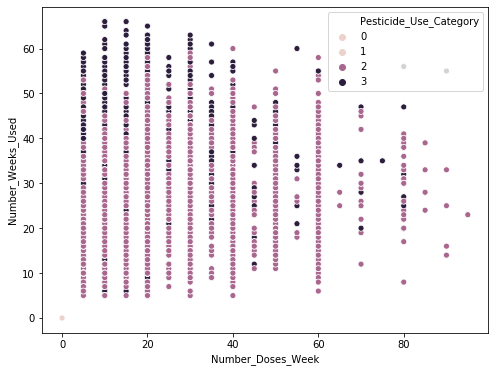

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Number_Doses_Week',y='Number_Weeks_Used' ,hue='Pesticide_Use_Category',data=new_train)
plt.show()

From the above graphs we can see that when the number of weeks were greater when the number of doses were less in a week.
here I observed that Number of doses and Number of weeks are inversely related.

# OUTIER ANALYSIS

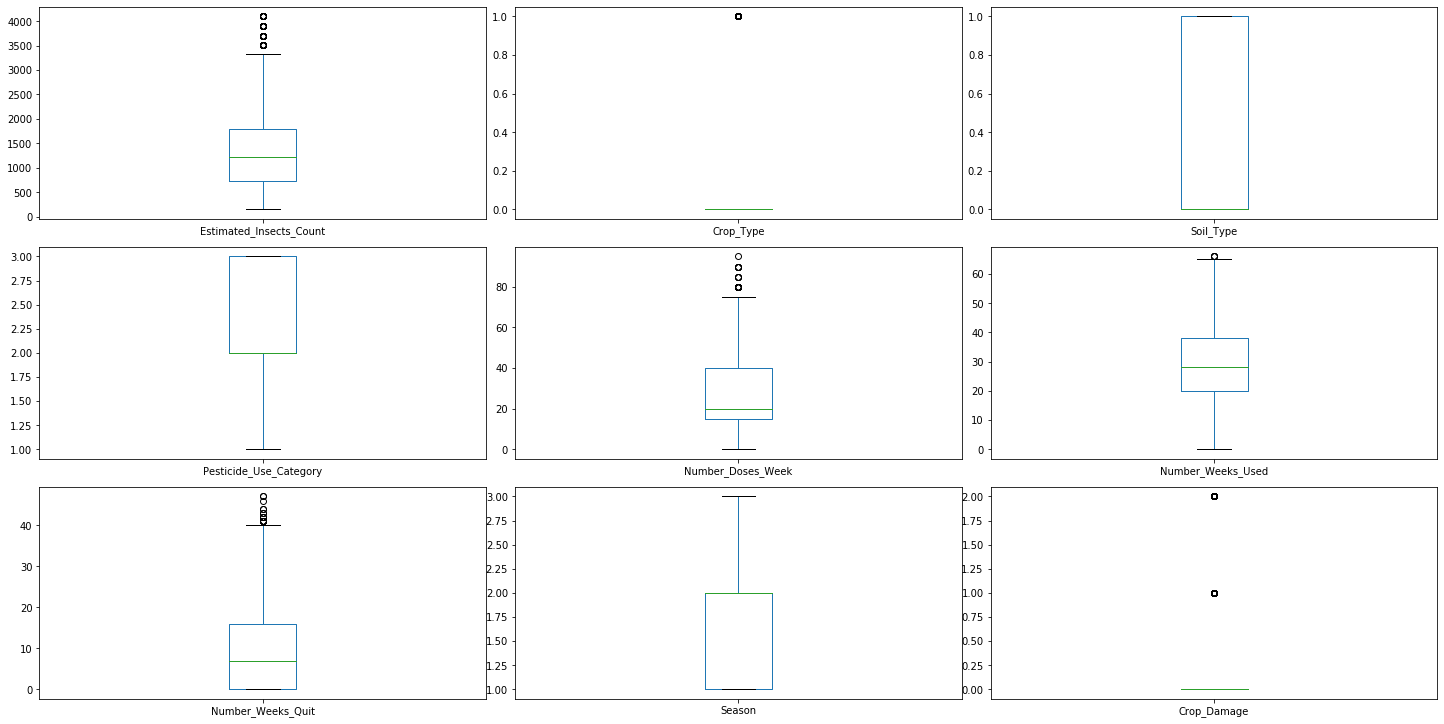

In [23]:
#plotting boxplot of all variables as subplots

fig, ax = plt.subplots(ncols=3 ,nrows=3 , figsize=(20,10))
index = 0
ax = ax.flatten()

for i,value in new_train.items():
        new_train.plot(kind='box',y=i,ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)

#there can be chance that there are outliers in some variables as we can see that the diff of max and 75% quantile is huge.
we will use the Z-score to remove the outliers.

In [24]:
from scipy.stats import zscore
z = np.abs(zscore(new_train))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [25]:
threshold = 3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  377,  384,  453,  458,  466,  480,  510,  517,  522,  557,
        595,  612,  634,  693,  702,  703,  704,  705,  706,  807,  819,
        855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067, 1097,
       1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339, 1340,
       1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406,
       1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868, 2019,
       2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183, 2185,
       2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553, 2565,
       2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702, 2710,
       2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806, 2814,
       2828, 2829, 2834, 2841, 2842, 2851, 2860, 2

In [26]:
data =new_train[(z<3).all(axis=1)]
data.shape

(4376, 9)

In [27]:
new_train.shape

(4599, 9)

# CORRELATION

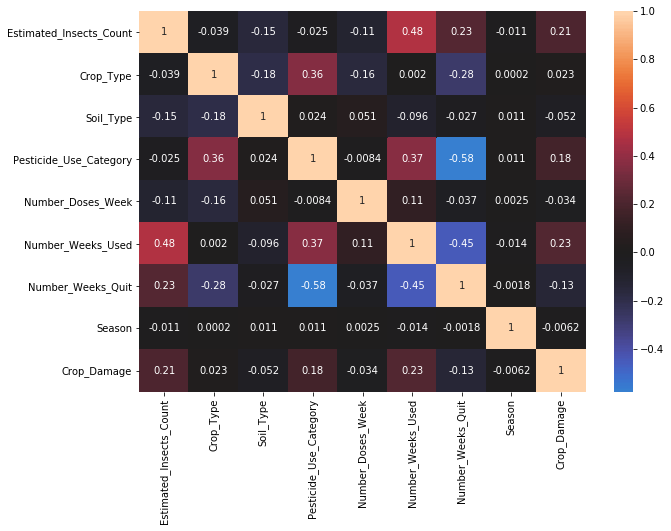

In [28]:
#Plotting correlation heatmap to check the relation of variables.

plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,center=0)
plt.show()

we can see that the there is not much correlation of the input variables with the target variables.
Will drop Season column, as it shows very very very less correlation.

# INPUT AND OUTPUT SPLITTING

In [29]:
X = data.drop(['Season','Crop_Damage'],axis=1)
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,188,1,0,1,0,0.0,0
1,209,1,0,1,0,0.0,0
2,257,1,0,1,0,0.0,0
3,257,1,1,1,0,0.0,0
4,342,1,0,1,0,0.0,0


In [30]:
Y = data['Crop_Damage']
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [31]:
#scaling Estimated_Insects_Count values using minmax Sclaer
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
X['Estimated_Insects_Count'] = mms.fit_transform(X[['Estimated_Insects_Count']])

# I have done this as, in our data set we mostly have categorical data, so it was not a good aproach to convert them as they do not need scaling
#so I only converted the Estimated_Insects_Count as the values in this were ranging alot.

In [32]:
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
0,0.010698,1,0,1,0,0.0,0
1,0.016610,1,0,1,0,0.0,0
2,0.030124,1,0,1,0,0.0,0
3,0.030124,1,1,1,0,0.0,0
4,0.054054,1,0,1,0,0.0,0


In [33]:
#checking skewness of the data after minmax scaler, and we do find a fair skewness, 
#on Crop_Type it is showing more right skewness but we will let it be as it is a categorical variable.
X.skew()

Estimated_Insects_Count    0.794068
Crop_Type                  1.309105
Soil_Type                  0.078698
Pesticide_Use_Category     0.749111
Number_Doses_Week          0.712831
Number_Weeks_Used          0.281594
Number_Weeks_Quit          0.815099
dtype: float64

# IMPORTING MODELS AND METRICS

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

# CROSS VAL TEST

In [35]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
         GaussianNB(),AdaBoostClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier()]

for model in models:
    print("model name =",model)
    model.scores = cross_val_score(model, X, Y, cv=10)
    print('Model scores :',model.scores)
    print('Model mean score: ',model.scores.mean())
    print('Model std score :', model.scores.std())
    print('\n')
    

model name = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Model scores : [0.76484018 0.84931507 0.85159817 0.85388128 0.85159817 0.85159817
 0.77345538 0.88100686 0.85812357 0.85354691]
Model mean score:  0.8388963773340439
Model std score : 0.035974385219360375


model name = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Model scores : [0.85388128 0.85388128 0.85388128 0.85388128 0.85159817 0.85159817
 0.85354691 0.85354691 0.85354691 0.85354691]
Model mean score:  0.8532909104207811
Model std score : 0.00085

We can see that the best results comes up with the support vector classification that is 85.33%, I will now be using grid search CV to check best parameters for SVC model

In [36]:
svc = SVC()

In [37]:
#providing parameters for SVC model

param = {'degree':[2,3,4],'gamma':['scale', 'auto'],
        'random_state':[40,45,50,55,60,65]}
grid_search = GridSearchCV(estimator = svc, param_grid = param)
grid_search.fit(X, Y)
grid_search.best_params_

{'degree': 2, 'gamma': 'scale', 'random_state': 40}

In [38]:
#creating Final model

svc = SVC(degree=2,gamma='scale',random_state=40)

In [39]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=.33,random_state=40)

In [40]:
svc_model = svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
Accuracy = accuracy_score(y_test,svc_pred)

In [41]:
print('Accuracy score :', Accuracy)

print('\n')

confusion_matrix(y_test,svc_pred)

print('\n')

print(classification_report(y_test,svc_pred))

Accuracy score : 0.855363321799308




              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1236
           1       0.00      0.00      0.00       209

    accuracy                           0.86      1445
   macro avg       0.43      0.50      0.46      1445
weighted avg       0.73      0.86      0.79      1445



In [42]:
confusion_matrix(y_test,svc_pred)

array([[1236,    0],
       [ 209,    0]], dtype=int64)

In [43]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1236
           1       0.00      0.00      0.00       209

    accuracy                           0.86      1445
   macro avg       0.43      0.50      0.46      1445
weighted avg       0.73      0.86      0.79      1445



In [44]:
# I will try and create a model without any gridsearch parameters.
#checking best Random state.

max_svc_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.33,random_state=r_state)
    svc_new = SVC()
    svc_new.fit(X_train,y_train)
    svc_new_pred = svc_new.predict(x_test)
    Accuracy = accuracy_score(y_test,svc_new_pred)
    if Accuracy>max_svc_score:
        max_svc_score=Accuracy
        final_r_state = r_state
        
print('max accuracy for the given ','', final_r_state, 'is', max_svc_score)

max accuracy for the given   55 is 0.8775086505190312


In [45]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=.33,random_state=55)
svc = SVC(probability=True)
svc_m = svc.fit(X_train,y_train)
svc_p = svc.predict(X_test)
svc_Accuracy = accuracy_score(y_test,svc_p)

print('Accuracy score :', svc_Accuracy)

print('\n')

print(confusion_matrix(y_test,svc_p))

print('\n')

print(classification_report(y_test,svc_p))

Accuracy score : 0.8775086505190312


[[1262    2]
 [ 175    6]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1264
           1       0.75      0.03      0.06       181

    accuracy                           0.88      1445
   macro avg       0.81      0.52      0.50      1445
weighted avg       0.86      0.88      0.83      1445



In [46]:
#we are getting more accuracy using default parameters of the SVC model.
#will use this.



# AUC-ROC CURVE

In [47]:
svc_pred_prob1 = svc.predict_proba(X_test)

In [48]:
#predicting the probability of having one
svc_pred_prob1 = svc.predict_proba(X_test)[:,1]
svc_pred_prob1

array([0.15542568, 0.13112015, 0.1548673 , ..., 0.15502265, 0.13700227,
       0.15696985])

In [49]:
#fpr = false positive rate
#tpr = true positive rate
#thresholds we set

fpr,tpr,thresholds = roc_curve(y_test,svc_pred_prob1)

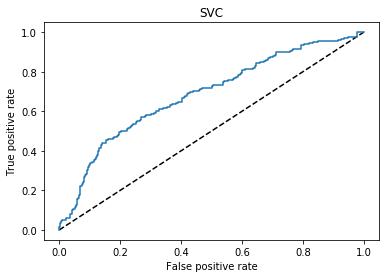

In [50]:
#plotting AUC ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC')
plt.show()

In [51]:
#saving results to csv file

result = pd.DataFrame(svc_p)
result.head()

,0
0,0
1,0
2,0
3,0
4,0


In [52]:
result.index = X_test.index # its important for comparison
result.columns = ["prediction"]
result.to_csv("prediction_results.csv")

# IMPORTING TEST DATA

In [53]:
test = pd.read_excel('test_agriculture.xlsx')
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [54]:
#here again I will remove the ID column , fill the missing values using forwardfill and convert 
#Estimated_Insects_Count using MinMax Scaler, jst like I did for train data set.

test.drop(['ID','Season'],axis=1,inplace=True)

In [55]:
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
dtype: int64

In [57]:
#filling up missing values using forward fill method.
new_test = test.fillna(method='ffill')

In [58]:
new_test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          1
Number_Weeks_Quit          0
dtype: int64

In [59]:
#we can see that we still have 1 row in which there is a missing value in Number_Weeks_Used this is because as we have used 
#forward fill method, there is no value above that missing value (upper most value) so we will be removing that row.

new_test.dropna(axis=0,inplace=True)
new_test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
dtype: int64

In [61]:
#now converting the Estiamted_insect_count in minmax sclaer values.
new_test['Estimated_Insects_Count'] = mms.fit_transform(new_test[['Estimated_Insects_Count']])
new_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
1,0.065873,1,1,1,0,0.0,0
2,0.120598,1,0,1,0,0.0,0
3,0.147200,1,0,1,0,0.0,0
4,0.161895,0,0,1,0,0.0,0
5,0.177603,0,1,1,0,0.0,0


In [63]:
X_train_new = X
X_test_new = new_test
y_train_new = Y

In [64]:
X_test_new.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
1,0.065873,1,1,1,0,0.0,0
2,0.120598,1,0,1,0,0.0,0
3,0.147200,1,0,1,0,0.0,0
4,0.161895,0,0,1,0,0.0,0
5,0.177603,0,1,1,0,0.0,0


In [65]:
#building our model, we will train X_train_new and y_train_new and then do our prediction on X_test_new

fin_model = SVC()

fin_model.fit(X_train_new,y_train_new)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
#prediction

fin_model.predict(X_test_new)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [67]:
#saving our predicted file into csv format.

In [68]:

final_result = pd.DataFrame(fin_model.predict(X_test_new))
final_result.head()

,0
0,1
1,1
2,1
3,1
4,1


In [69]:
final_result.index = X_test_new.index # its important for comparison
final_result.columns = ["prediction"]
final_result.to_csv("prediction.csv")

In [70]:
#Saving the model

#saving the model
from sklearn.externals import joblib
joblib.dump(fin_model.predict(X_test_new),'Crop_Damage.pkl')

['Crop_Damage.pkl']